In [1]:
#import essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import dataset using pandas dataframe
dataset = pd.read_csv('Position_Salaries.csv')


In [3]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 240.0+ bytes


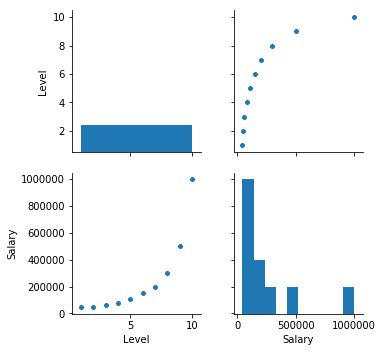

In [6]:
##simple data visualisation 
sns.pairplot(dataset)

In [13]:
from sklearn.svm import SVR
svr = SVR()
svr2 = SVR()

In [8]:
#Split data
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2:].values

In [9]:
svr.fit(X,y)

C:\Program Files (x86)\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

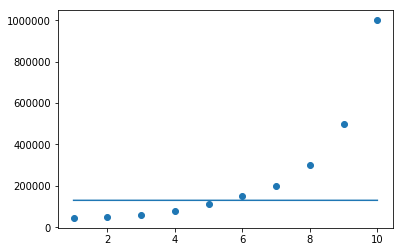

In [10]:
plt.scatter(X,y)
plt.plot(X, svr.predict(X))

In [11]:
##lets fix this by scalling the values
#we import the standard scaler class
from sklearn.preprocessing import StandardScaler
X_sc = StandardScaler()
y_sc = StandardScaler()
X = X_sc.fit_transform(X)
y = y_sc.fit_transform(y)

C:\Program Files (x86)\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


C:\Program Files (x86)\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


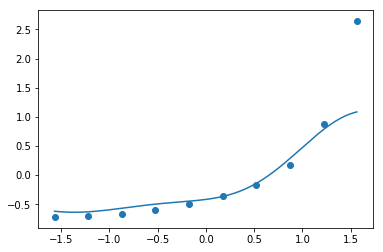

In [15]:
#let's plot the new prediction 
svr2.fit(X,y)
X_grid = np.arange(min(X), max(X), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X,y)
plt.plot(X_grid, svr2.predict(X_grid))

In [16]:
ypred = svr2.predict(6.5)
ypred = y_sc.inverse_transform(ypred)

In [17]:
ypred

array([252789.13921624])